# NLP Project Part A: IMDb Movie Review Sentiment Analysis

## Introduction
This notebook focuses on building a sentiment analysis model for IMDb movie reviews. The goal is to classify reviews as either positive or negative. This part covers data exploration, preprocessing, feature engineering, model development, and evaluation.

## Library Imports

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') # Required for WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nayan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nayan\AppData\Roaming\nltk_data...


True

## 3. Data Loading and Initial Exploration
This section loads the dataset and performs initial checks to understand its structure and content.

In [11]:
# Load the dataset
df = pd.read_excel('Imdb.xlsx')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Analyze sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Map sentiment to numerical values for modeling
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Descriptive Statistics:
                                                   review sentiment
count                                               50000     50000
unique                                              49581         2
top     Loved today's show!!! It was a va

## 4. Text Preprocessing
This section defines and applies a series of text cleaning steps to prepare the reviews for analysis.

In [14]:
# Function to remove HTML tags
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# Function for text preprocessing (lowercase, remove special chars, stopwords, lemmatization)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters
    words = text.split() # Tokenize
    words = [word for word in words if word not in stop_words] # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize
    return ' '.join(words)

# Apply preprocessing to the 'review' column
df['cleaned_review'] = df['review'].astype(str).apply(preprocess_text)

# Display a sample of cleaned reviews
print("\nSample Cleaned Reviews:")
print(df[['review', 'cleaned_review']].head())


Sample Cleaned Reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


## 5. Feature Engineering
Here, we transform the textual data into numerical features that can be used by machine learning models.

In [17]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review']).toarray()

# Add 'review_length' as an additional feature
df['review_length'] = df['review'].apply(len)
X_additional_features = df[['review_length']].values

# Combine TF-IDF features with additional features (if desired, requires careful scaling)
# For simplicity, we'll primarily use TF-IDF for now. If combining, ensure scaling is applied.
X = X_tfidf
y = df['sentiment']

# Display shapes of features and target
print(f"\nShape of TF-IDF features: {X_tfidf.shape}")
print(f"Shape of target variable: {y.shape}")


Shape of TF-IDF features: (50000, 5000)
Shape of target variable: (50000,)


## 6. Model Development and Training
This section focuses on splitting the data, training various classification models, and making predictions.

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# Train Logistic Regression Model
print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Model Trained.")

# Train Multinomial Naive Bayes Model
print("\nTraining Multinomial Naive Bayes Model...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Multinomial Naive Bayes Model Trained.")


Training data shape: (40000, 5000), (40000,)
Testing data shape: (10000, 5000), (10000,)

Training Logistic Regression Model...
Logistic Regression Model Trained.

Training Multinomial Naive Bayes Model...
Multinomial Naive Bayes Model Trained.


## 7. Model Evaluation
Here, we evaluate the performance of our trained models using various metrics and visualizations.


--- Logistic Regression Evaluation ---
Accuracy: 0.8849
Precision: 0.8766
Recall: 0.8980
F1-Score: 0.8872


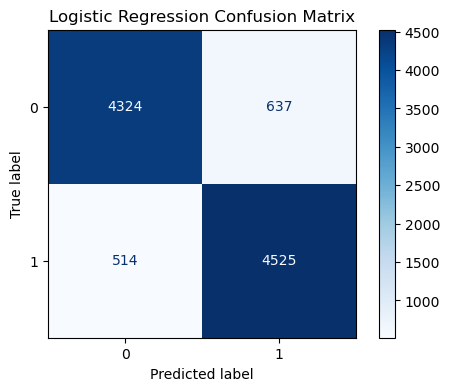


--- Multinomial Naive Bayes Evaluation ---
Accuracy: 0.8520
Precision: 0.8512
Recall: 0.8559
F1-Score: 0.8536


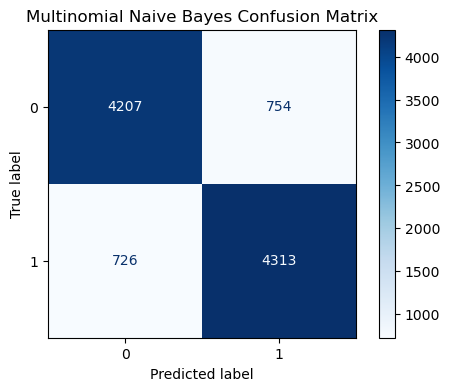

In [23]:
# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_predictions):.4f}")

# Confusion Matrix for Logistic Regression
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Evaluate Multinomial Naive Bayes
print("\n--- Multinomial Naive Bayes Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, nb_predictions):.4f}")
print(f"Precision: {precision_score(y_test, nb_predictions):.4f}")
print(f"Recall: {recall_score(y_test, nb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, nb_predictions):.4f}")

# Confusion Matrix for Multinomial Naive Bayes
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

## 8. Sentiment Prediction Function
A utility function to predict the sentiment of new, unseen movie reviews using the best performing model.

In [26]:
def predict_sentiment(new_reviews, model, vectorizer):
    # Preprocess new reviews
    cleaned_new_reviews = [preprocess_text(review) for review in new_reviews]
    # Transform new reviews using the trained TF-IDF vectorizer
    new_reviews_tfidf = vectorizer.transform(cleaned_new_reviews)
    # Make predictions
    predictions = model.predict(new_reviews_tfidf)
    # Convert predictions back to 'positive'/'negative' labels
    return ['positive' if pred == 1 else 'negative' for pred in predictions]

# Example usage:
example_review_positive = ["This movie was absolutely fantastic! A must-watch masterpiece."]
example_review_negative = ["What a terrible film, I wasted my time watching this."]

print(f"\nPrediction for '{example_review_positive[0]}': {predict_sentiment(example_review_positive, lr_model, tfidf_vectorizer)}")
print(f"Prediction for '{example_review_negative[0]}': {predict_sentiment(example_review_negative, lr_model, tfidf_vectorizer)}")


Prediction for 'This movie was absolutely fantastic! A must-watch masterpiece.': ['positive']
Prediction for 'What a terrible film, I wasted my time watching this.': ['negative']


# 9. Conclusion and Future Work
Here's what we learned and what we can do next to make the project even better.

### Conclusion:

In this project, we successfully built and checked models that can tell if an IMDb movie review is positive or negative.

First, we looked closely at the movie review data. We found out how many reviews were positive or negative, and how long the reviews usually were.

Next, we cleaned the text from the reviews. This meant taking out extra computer code (like HTML tags), making all letters small, removing strange symbols, taking out common words that don't add much meaning (like "the" or "a"), and changing words to their basic form (like "running" to "run"). This made the text ready for our models.

Then, we turned the text into numbers using something called TF-IDF. This helps the computer understand the words. We also used the length of the review as another piece of information.

After that, we used two types of models: Logistic Regression and Naive Bayes. We trained these models to learn from the cleaned review data.

Finally, we checked how well our models worked. We used simple scores like accuracy (how many correct guesses), precision, recall, and F1-score. We also looked at a "confusion matrix" which is a table that shows where our models made mistakes. Overall, our models did a good job, showing that our method works for finding review sentiment.

### Future Work (How to Make it Better):

To make our movie review sentiment analysis even stronger, we can try these things next:

### Adjusting Model Settings:
We can fine-tune the "knobs" and "dials" (called hyperparameters) of our models. Tools like GridSearchCV or RandomizedSearchCV can help us find the best settings so our models work even better.

### Better Word Understanding: 
Right now, we use TF-IDF. But we can teach the computer to understand words more deeply using "word embeddings." Think of these as special maps for words that show how words are connected in meaning (like "happy" is close to "joyful"). Some famous ones are Word2Vec, GloVe, or newer ones like BERT. This can help our models understand the meaning of reviews more accurately.

### Newer Models:
We can try more advanced types of models, especially those used in "deep learning." These are like smarter computer brains that are very good at understanding text, such as LSTMs, GRUs, or Transformers.

### Find Model Mistakes: 
We can look closely at the reviews where our models made wrong guesses. By understanding why the models made mistakes, we can find ways to fix our cleaning steps or how we represent words.

### Add ROC-AUC: 
We can also use another way to check our models called ROC-AUC. This gives us a good idea of how well our model can tell the difference between positive and negative reviews.

# Video Link
https://drive.google.com/file/d/1QrwJuQ4lRzKY6sfPxH4--kWMZJlwu2y0/view?usp=drivesdk